In [ ]:
!pip install eli5

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *


##use this for holdout 25/75 >>>>>>>>>>>>>>>.
# train_values = np.empty(shape=[0, 222])
# test_values = np.empty(shape=[0, 222])

# train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

# for j in train_sampled_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     train_values = np.append(train_values, csvrows, axis=0)

# for j in test_unsampled_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)
    
# print(train_values.shape)
# print(test_values.shape)

## use this for leave patients >>>>>>>>>>>>>>>.

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_patients = glob.glob('./drive/MyDrive/compsci/train_patients.csv')
test_patients = glob.glob('./drive/MyDrive/compsci/test_patients.csv')

for j in train_patients:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)

for j in test_patients:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

Loading  ./drive/MyDrive/compsci/train_patients.csv
Loading  ./drive/MyDrive/compsci/test_patients.csv
(206312, 222)
(14380, 222)


In [ ]:
from itertools import islice

def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = X_train
new_X_train = []
for i in range(len(X_train)):
  means = list(means_of_slices(a[i], 20))
  new_X_train.append(means)
X_train = np.array(new_X_train)
# X_train = []
# for i in new_X_train:
#   X_train.append(np.repeat(i,17))
# X_train = np.array(X_train)
# print(X_train.shape)

b = X_test
new_X_test = []
for i in range(len(X_test)):
  means = list(means_of_slices(b[i], 20))
  new_X_test.append(means)
X_test = np.array(new_X_test)
# X_test = []
# for i in new_X_test:
#   X_test.append(np.repeat(i,17))
# X_test = np.array(X_test)
# print(X_test.shape)

In [ ]:
from sklearn.metrics import *
def showResults(test, pred, model_name):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average = 'macro')
    f1score= f1_score(test, pred, average='macro') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score : {}".format(f1score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred,labels=[1,2,3,4,5,6,7,8])
    cm = np.nan_to_num(cm)
    print(cm)
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

In [ ]:
# using gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,random_state=48, n_iter_no_change=5,tol=0.1)
gbc_clf.fit(X_train, y_train)
print('Gradient Boosting Results')
y_pred_gbc = gbc_clf.predict(X_test)
print(gbc_clf.score(X_test,y_test))

# using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=48)
ada_clf.fit(X_train, y_train)
print('Ada Boosting Results')
y_pred_ada = ada_clf.predict(X_test)
print(ada_clf.score(X_test,y_test))

# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
rfc_clf.fit(X_train, y_train)
print('Random Forest Results')
y_pred_rfc = rfc_clf.predict(X_test)
print(rfc_clf.score(X_test, y_test))

# using naive bayes
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print('Naive Bayes Results')
y_pred_NB = NB_clf.predict(X_test)
print(NB_clf.score(X_test, y_test))

# using NN Multi Layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
NNMLP_clf = MLPClassifier(random_state=48, max_iter=100)
NNMLP_clf.fit(X_train, y_train)
print('NNMLP Results')
y_pred_NNMLP = NNMLP_clf.predict(X_test)
print(NNMLP_clf.score(X_test, y_test))

#support vector classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
print('Support Vector Results')
y_pred_svc = svc_clf.predict(X_test)
print(svc_clf.score(X_test,y_test))

Gradient Boosting Results
0.8842837273991655
Ada Boosting Results
0.24777468706536857
Random Forest Results
0.901182197496523
Naive Bayes Results
0.4070931849791377


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NNMLP Results
0.9372739916550765
Support Vector Results
0.9291376912378303


In [ ]:
##Use only when running on all data
gbc_results = showResults(y_test, y_pred_gbc,'GBC')
ada_results = showResults(y_test, y_pred_ada,'ADA')
rfc_results = showResults(y_test, y_pred_rfc,'RFC')
nb_results = showResults(y_test, y_pred_NB,'NB')
nnmlp_results = showResults(y_test, y_pred_NNMLP,'NNMLP')
svc_results = showResults(y_test, y_pred_svc,'SVC')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.8842837273991655
Precision : 0.4887293317367766
Recall : 0.5828685037581958
f1score : 0.510909986500992
[[7977  147   20  166   89  976  109    1]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   5    0    0  594    6   18    2    2]
 [   0    0    0    0    0    0    0    0]
 [  12    0    0    7    0  387    3    0]
 [  20    3    3   14    8    4 1075   16]
 [   1    0    0    1    2    0   29 2683]]
Accuracy  : 0.24777468706536857
Precision : 0.2632546748753586
Recall : 0.19861502958269156
f1score : 0.14192789853453003
[[2182 1031  321  355 2212 2399  984    1]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   8  129    1   29    4   38  410    8]
 [   0    0    0    0    0    0    0    0]
 [  42   30    6   30    1  295    5    0]
 [  60  124   22  107  103  263  399   65]
 [   1    1    0   29    0    0 2027  658]]
Accuracy  : 0.901182197496523
Precision : 0.5060160143036196
Recall : 

In [ ]:
misclass_gbc = np.where(y_pred_gbc!=y_test)
misclass_gbc = misclass_gbc[0].tolist()
print(misclass_gbc)

correct_gbc = np.where(y_pred_gbc==y_test)
correct_gbc = correct_gbc[0].tolist()
print(correct_gbc)

[4, 23, 77, 84, 93, 94, 111, 117, 124, 125, 126, 135, 145, 147, 158, 159, 169, 170, 181, 190, 191, 192, 193, 203, 205, 207, 218, 219, 222, 223, 227, 229, 254, 263, 285, 286, 287, 293, 294, 295, 298, 299, 300, 302, 304, 306, 307, 309, 310, 328, 333, 363, 366, 373, 374, 375, 376, 377, 379, 380, 381, 382, 383, 385, 386, 387, 388, 392, 403, 404, 405, 408, 428, 465, 468, 470, 486, 487, 509, 518, 524, 526, 542, 558, 571, 585, 586, 600, 601, 615, 619, 628, 663, 664, 668, 677, 678, 712, 723, 726, 735, 766, 796, 810, 859, 869, 879, 931, 940, 966, 1017, 1063, 1082, 1141, 1151, 1159, 1193, 1217, 1227, 1284, 1294, 1299, 1303, 1306, 1356, 1365, 1382, 1400, 1428, 1436, 1446, 1454, 1456, 1463, 1504, 1514, 1517, 1524, 1552, 1584, 1589, 1594, 1596, 1650, 1658, 1666, 1667, 1675, 1718, 1719, 1720, 1727, 1733, 1737, 1740, 1747, 1764, 1796, 1802, 1806, 1809, 1816, 1826, 1827, 1874, 1878, 1890, 1932, 1939, 1958, 1968, 2030, 2038, 2079, 2099, 2106, 2124, 2134, 2143, 2151, 2175, 2176, 2182, 2183, 2193, 2207, 

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

perm_gbc = PermutationImportance(gbc_clf).fit(X_test, y_test)
print('GBC Results')
exp_gbc = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Results


In [ ]:
perm_gbc = PermutationImportance(gbc_clf).fit(X_test[correct_gbc[:]], y_test[correct_gbc[:]])
print('GBC Correct Results')
exp_gbc_corr = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Correct Results


In [ ]:
perm_gbc = PermutationImportance(gbc_clf).fit(X_test[misclass_gbc[:]], y_test[misclass_gbc[:]])
print('GBC Misclass Results')
exp_gbc_mis = eli5.explain_weights_df(perm_gbc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

GBC Misclass Results


In [ ]:
misclass_ada = np.where(y_pred_ada!=y_test)
misclass_ada = misclass_ada[0].tolist()
print(misclass_ada)

correct_ada = np.where(y_pred_ada==y_test)
correct_ada = correct_ada[0].tolist()
print(correct_ada)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,

In [ ]:
perm_ada = PermutationImportance(ada_clf).fit(X_test, y_test)
print('ADA Results')
exp_ada = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Results


In [ ]:
perm_ada = PermutationImportance(ada_clf).fit(X_test[correct_ada[:]], y_test[correct_ada[:]])
print('ADA Correct Results')
exp_ada_corr = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Correct Results


In [ ]:
perm_ada = PermutationImportance(ada_clf).fit(X_test[misclass_ada[:]], y_test[misclass_ada[:]])
print('ADA Misclass Results')
exp_ada_mis = eli5.explain_weights_df(perm_ada, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

ADA Misclass Results


In [ ]:
misclass_rfc = np.where(y_pred_rfc!=y_test)
misclass_rfc = misclass_rfc[0].tolist()
print(misclass_rfc)

correct_rfc = np.where(y_pred_rfc==y_test)
correct_rfc = correct_rfc[0].tolist()
print(correct_rfc)

[4, 23, 77, 111, 116, 193, 205, 229, 230, 233, 299, 309, 328, 373, 375, 377, 380, 384, 386, 388, 400, 404, 405, 428, 449, 468, 487, 518, 524, 525, 526, 542, 628, 796, 810, 931, 940, 966, 1063, 1151, 1294, 1303, 1356, 1367, 1428, 1454, 1504, 1584, 1596, 1675, 1720, 1727, 1737, 1740, 1764, 1806, 1809, 1816, 1827, 1878, 1932, 1963, 2038, 2051, 2058, 2086, 2106, 2124, 2134, 2143, 2151, 2160, 2171, 2180, 2182, 2183, 2193, 2207, 2208, 2210, 2216, 2229, 2230, 2243, 2244, 2260, 2261, 2263, 2264, 2265, 2267, 2268, 2269, 2270, 2271, 2274, 2275, 2276, 2277, 2278, 2299, 2308, 2315, 2337, 2339, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2349, 2350, 2351, 2353, 2354, 2356, 2357, 2358, 2359, 2360, 2361, 2365, 2367, 2368, 2419, 2422, 2423, 2424, 2426, 2428, 2429, 2430, 2431, 2433, 2435, 2436, 2439, 2464, 2465, 2469, 2491, 2492, 2504, 2515, 2516, 2533, 2555, 2556, 2559, 2579, 2580, 2598, 2602, 2619, 2621, 2625, 2636, 2637, 2651, 2666, 2667, 2686, 2699, 2700, 2712, 2713, 2736, 2750, 2765, 2766, 2779, 280

In [ ]:
perm_rfc = PermutationImportance(rfc_clf).fit(X_test, y_test)
print('RFC Results')
exp_rfc = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Results


In [ ]:
perm_rfc =PermutationImportance(rfc_clf).fit(X_test[correct_rfc[:]], y_test[correct_rfc[:]])
print('RFC Correct Results')
exp_rfc_corr = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Correct Results


In [ ]:
perm_rfc =PermutationImportance(rfc_clf).fit(X_test[misclass_rfc[:]], y_test[misclass_rfc[:]])
print('RFC Misclass Results')
exp_rfc_mis = eli5.explain_weights_df(perm_rfc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

RFC Misclass Results


In [ ]:
misclass_nb = np.where(y_pred_NB!=y_test)
misclass_nb = misclass_nb[0].tolist()
print(misclass_nb)

correct_nb = np.where(y_pred_NB==y_test)
correct_nb = correct_nb[0].tolist()
print(correct_nb)

[4, 11, 17, 28, 30, 34, 40, 53, 59, 77, 78, 84, 86, 93, 94, 95, 102, 104, 111, 116, 117, 118, 124, 125, 126, 135, 136, 137, 145, 147, 157, 158, 159, 161, 169, 170, 180, 181, 182, 190, 191, 192, 193, 203, 204, 205, 209, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 249, 250, 251, 257, 263, 264, 265, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 312, 313, 314, 315, 317, 325, 326, 328, 363, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 388, 389, 392, 393, 395, 404, 411, 428, 429, 433, 434, 435, 439, 449, 450, 453, 465, 467, 468, 469, 486, 487, 493, 494, 496, 509, 513, 514, 515, 518, 524, 525, 526, 527, 529, 542, 545, 547, 557, 558, 571, 575, 585, 586, 589, 600, 601, 615, 616, 619, 627, 628, 629, 630, 640, 641, 651, 663, 664, 677, 678, 690, 702, 712, 723, 734, 735, 746, 747, 748, 757, 766, 775, 785, 7

In [ ]:
perm_nb = PermutationImportance(NB_clf).fit(X_test, y_test)
print('NB Results')
exp_nb = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Results


In [ ]:
perm_nb =PermutationImportance(NB_clf).fit(X_test[correct_nb[:]], y_test[correct_nb[:]])
print('NB Correct Results')
exp_nb_corr = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Correct Results


In [ ]:
perm_nb =PermutationImportance(NB_clf).fit(X_test[misclass_nb[:]], y_test[misclass_nb[:]])
print('NB Misclass Results')
exp_nb_mis = eli5.explain_weights_df(perm_nb, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NB Misclass Results


In [ ]:
misclass_nnmlp = np.where(y_pred_NNMLP!=y_test)
misclass_nnmlp = misclass_nnmlp[0].tolist()
print(misclass_nnmlp)

correct_nnmlp = np.where(y_pred_NNMLP==y_test)
correct_nnmlp = correct_nnmlp[0].tolist()
print(correct_nnmlp)

[47, 77, 94, 102, 111, 112, 116, 124, 135, 145, 147, 157, 158, 159, 170, 181, 190, 191, 203, 204, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 263, 281, 285, 286, 287, 288, 290, 291, 292, 293, 294, 295, 296, 297, 299, 300, 301, 303, 304, 307, 309, 310, 313, 328, 333, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 405, 428, 429, 449, 450, 465, 470, 486, 487, 509, 518, 524, 542, 557, 558, 571, 585, 586, 601, 616, 619, 628, 664, 668, 678, 723, 726, 735, 766, 796, 823, 869, 879, 933, 949, 951, 959, 966, 986, 999, 1017, 1063, 1073, 1082, 1094, 1132, 1144, 1217, 1227, 1267, 1294, 1303, 1307, 1356, 1364, 1367, 1400, 1428, 1436, 1446, 1454, 1456, 1463, 1514, 1517, 1524, 1552, 1584, 1594, 1596, 1650, 1658, 1667, 1675, 1720, 1727, 1737, 1740, 1796, 1806, 1809, 1810, 1827, 1878, 1890, 1899, 1932, 1958, 2023, 2064, 2106, 2124, 2134, 2143, 2151, 2164, 2175, 2176, 2181, 2183, 2193, 2207, 2208, 2216, 222

In [ ]:
perm_nnmlp = PermutationImportance(NNMLP_clf).fit(X_test, y_test)
print('NNMLP Results')
exp_nnmlp = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Results


In [ ]:
perm_nnmlp =PermutationImportance(NNMLP_clf).fit(X_test[correct_nnmlp[:]], y_test[correct_nnmlp[:]])
print('NNMLP Correct Results')
exp_nnmlp_corr = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Correct Results


In [ ]:
perm_nnmlp =PermutationImportance(NNMLP_clf).fit(X_test[misclass_nnmlp[:]], y_test[misclass_nnmlp[:]])
print('NNMLP Misclass Results')
exp_nnmlp_mis = eli5.explain_weights_df(perm_nnmlp, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

NNMLP Misclass Results


In [ ]:
misclass_svc = np.where(y_pred_svc!=y_test)
misclass_svc = misclass_svc[0].tolist()
print(misclass_svc)

correct_svc = np.where(y_pred_svc==y_test)
correct_svc = correct_svc[0].tolist()
print(correct_svc)

[93, 94, 111, 112, 124, 135, 145, 159, 181, 203, 204, 213, 214, 215, 216, 217, 219, 221, 222, 223, 224, 227, 229, 230, 231, 232, 233, 263, 281, 286, 288, 290, 291, 292, 293, 294, 295, 297, 299, 300, 301, 302, 303, 304, 306, 309, 310, 313, 328, 363, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 382, 387, 405, 429, 449, 450, 465, 470, 487, 509, 518, 524, 526, 542, 558, 586, 600, 601, 615, 616, 619, 627, 628, 651, 663, 664, 668, 677, 678, 712, 726, 735, 766, 810, 823, 859, 931, 933, 951, 959, 966, 986, 1017, 1073, 1094, 1132, 1141, 1144, 1151, 1159, 1162, 1193, 1217, 1227, 1239, 1267, 1284, 1303, 1307, 1356, 1364, 1382, 1400, 1428, 1454, 1456, 1463, 1484, 1504, 1517, 1524, 1552, 1584, 1585, 1594, 1666, 1667, 1675, 1718, 1720, 1727, 1730, 1737, 1740, 1747, 1796, 1809, 1816, 1826, 1827, 1878, 1890, 1939, 1958, 1968, 2073, 2106, 2124, 2134, 2143, 2151, 2162, 2181, 2191, 2193, 2194, 2196, 2203, 2207, 2208, 2229, 2230, 2243, 2264, 2267, 2270, 2271, 2272, 2273, 2274, 2278, 22

In [ ]:
perm_svc = PermutationImportance(svc_clf).fit(X_test, y_test)
print('SVC Results')
exp_svc = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Results


In [ ]:
perm_svc =PermutationImportance(svc_clf).fit(X_test[correct_svc[:]], y_test[correct_svc[:]])
print('SVC Correct Results')
exp_svc_corr = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Correct Results


In [ ]:
perm_svc =PermutationImportance(svc_clf).fit(X_test[misclass_svc[:]], y_test[misclass_svc[:]])
print('SVC Misclass Results')
exp_svc_mis = eli5.explain_weights_df(perm_svc, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

SVC Misclass Results


In [ ]:
from sklearn import metrics

metrics_gbc = metrics.classification_report(y_test, y_pred_gbc, digits=3)
metrics_ada = metrics.classification_report(y_test, y_pred_ada, digits=3)
metrics_rfc = metrics.classification_report(y_test, y_pred_rfc, digits=3)
metrics_NB = metrics.classification_report(y_test, y_pred_NB, digits=3)
metrics_NNMLP = metrics.classification_report(y_test, y_pred_NNMLP, digits=3)
metrics_svc = metrics.classification_report(y_test, y_pred_svc, digits=3)

print(metrics_gbc, 'gbc metrics')
print(metrics_ada, 'ada metrics')
print(metrics_rfc, 'rfc metrics')
print(metrics_NB, 'NB metrics')
print(metrics_NNMLP, 'NNMLP metrics')
print(metrics_svc, 'svc metrics')

              precision    recall  f1-score   support

         1.0      0.995     0.841     0.912      9485
         2.0      0.000     0.000     0.000         0
         3.0      0.000     0.000     0.000         0
         4.0      0.760     0.947     0.843       627
         5.0      0.000     0.000     0.000         0
         6.0      0.279     0.946     0.431       409
         7.0      0.883     0.941     0.911      1143
         8.0      0.993     0.988     0.990      2716

    accuracy                          0.884     14380
   macro avg      0.489     0.583     0.511     14380
weighted avg      0.955     0.884     0.910     14380
 gbc metrics
              precision    recall  f1-score   support

         1.0      0.952     0.230     0.371      9485
         2.0      0.000     0.000     0.000         0
         3.0      0.000     0.000     0.000         0
         4.0      0.053     0.046     0.049       627
         5.0      0.000     0.000     0.000         0
         6.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'SVC confusion matrix')

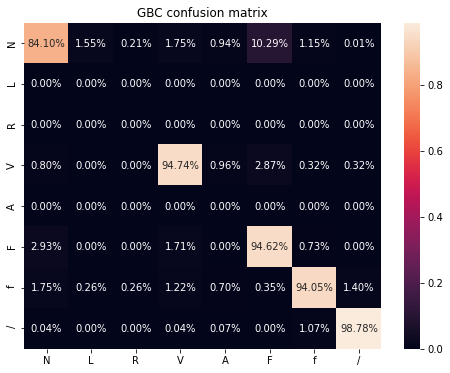

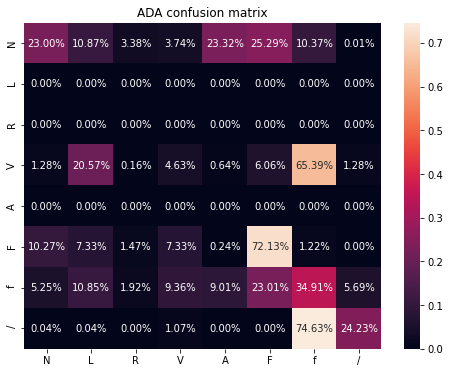

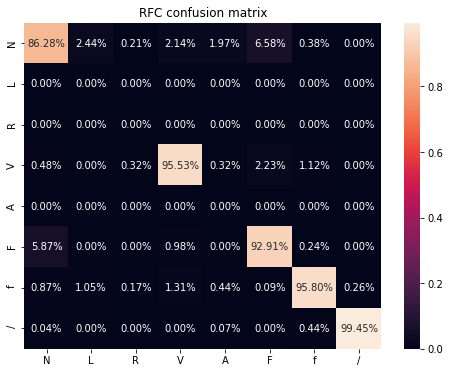

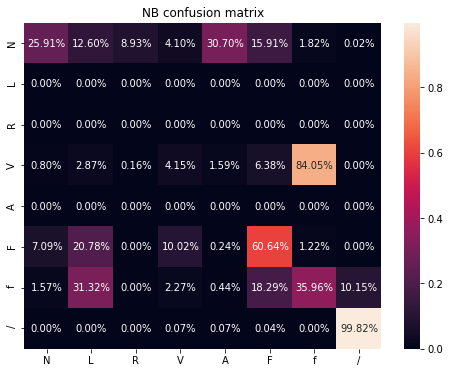

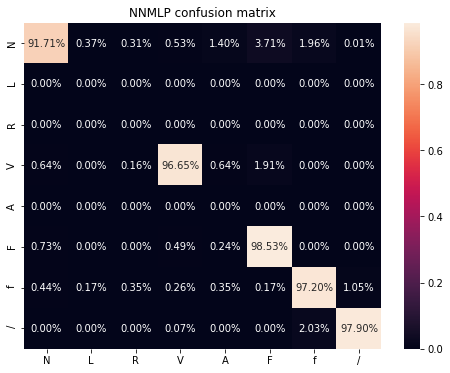

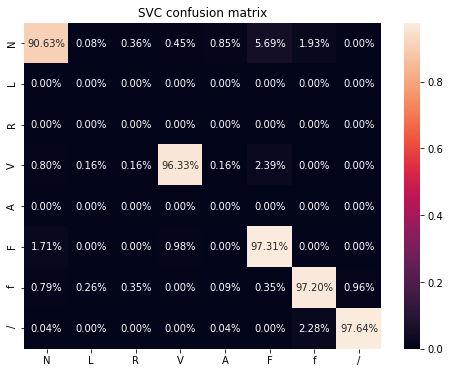

In [ ]:
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

categories = ['N','L','R','V','A','F','f','/']

gbc_cf_m = confusion_matrix(y_test,y_pred_gbc,labels=[1,2,3,4,5,6,7,8])
gbc_cf_m = gbc_cf_m.astype('float')/ gbc_cf_m.sum(axis=1)[:,np.newaxis]
gbc_pr_s = precision_score(y_test,y_pred_gbc,average='weighted')

ada_cf_m = confusion_matrix(y_test,y_pred_ada,labels=[1,2,3,4,5,6,7,8])
ada_cf_m = ada_cf_m.astype('float')/ ada_cf_m.sum(axis=1)[:,np.newaxis]
ada_pr_s = precision_score(y_test,y_pred_ada,average='weighted')

rfc_cf_m = confusion_matrix(y_test,y_pred_rfc,labels=[1,2,3,4,5,6,7,8])
rfc_cf_m = rfc_cf_m.astype('float')/ rfc_cf_m.sum(axis=1)[:,np.newaxis]
rfc_pr_s = precision_score(y_test,y_pred_rfc,average='weighted')

NB_cf_m = confusion_matrix(y_test,y_pred_NB,labels=[1,2,3,4,5,6,7,8])
NB_cf_m = NB_cf_m.astype('float')/ NB_cf_m.sum(axis=1)[:,np.newaxis]
NB_pr_s = precision_score(y_test,y_pred_NB,average='weighted')

NNMLP_cf_m = confusion_matrix(y_test,y_pred_NNMLP,labels=[1,2,3,4,5,6,7,8])
NNMLP_cf_m = NNMLP_cf_m.astype('float')/ NNMLP_cf_m.sum(axis=1)[:,np.newaxis]
NNMLP_pr_s = precision_score(y_test,y_pred_NNMLP,average='weighted')

svc_cf_m = confusion_matrix(y_test,y_pred_svc,labels=[1,2,3,4,5,6,7,8])
svc_cf_m = svc_cf_m.astype('float')/ svc_cf_m.sum(axis=1)[:,np.newaxis]
svc_pr_s = precision_score(y_test,y_pred_svc,average='weighted')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(gbc_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('GBC confusion matrix')
# plt.savefig('gbc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(ada_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('ADA confusion matrix')
# plt.savefig('ada_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(rfc_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('RFC confusion matrix')
# plt.savefig('rfc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(NB_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NB confusion matrix')
# plt.savefig('NB_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(NNMLP_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NNMLP confusion matrix')
# plt.savefig('NNMLP_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(np.nan_to_num(svc_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('SVC confusion matrix')
# plt.savefig('SVC_cfm.jpeg')

In [ ]:
# exp_gbc = exp_gbc.sort_values(by=['feature'])
# exp_gbc_corr = exp_gbc_corr.sort_values(by=['feature'])
# exp_gbc_mis = exp_gbc_mis.sort_values(by=['feature'])

# exp_gbc.to_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi.csv', encoding='utf-8', index=False)
# exp_gbc_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi_corr.csv', encoding='utf-8', index=False)
# exp_gbc_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/gbc_pfi_mis.csv', encoding='utf-8', index=False)

# exp_ada = exp_ada.sort_values(by=['feature'])
# exp_ada_corr = exp_ada_corr.sort_values(by=['feature'])
# exp_ada_mis = exp_ada_mis.sort_values(by=['feature'])

# exp_ada.to_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi.csv', encoding='utf-8', index=False)
# exp_ada_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi_corr.csv', encoding='utf-8', index=False)
# exp_ada_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/ada_pfi_mis.csv', encoding='utf-8', index=False)

# exp_rfc = exp_rfc.sort_values(by=['feature'])
# exp_rfc_corr = exp_rfc_corr.sort_values(by=['feature'])
# exp_rfc_mis = exp_rfc_mis.sort_values(by=['feature'])

# exp_rfc.to_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi.csv', encoding='utf-8', index=False)
# exp_rfc_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi_corr.csv', encoding='utf-8', index=False)
# exp_rfc_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/rfc_pfi_mis.csv', encoding='utf-8', index=False)

# exp_nb = exp_nb.sort_values(by=['feature'])
# exp_nb_corr = exp_nb_corr.sort_values(by=['feature'])
# exp_nb_mis = exp_nb_mis.sort_values(by=['feature'])

# exp_nb.to_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi.csv', encoding='utf-8', index=False)
# exp_nb_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi_corr.csv', encoding='utf-8', index=False)
# exp_nb_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/nb_pfi_mis.csv', encoding='utf-8', index=False)

# exp_nnmlp = exp_nnmlp.sort_values(by=['feature'])
# exp_nnmlp_corr = exp_nnmlp_corr.sort_values(by=['feature'])
# exp_nnmlp_mis = exp_nnmlp_mis.sort_values(by=['feature'])

# exp_nnmlp.to_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi.csv', encoding='utf-8', index=False)
# exp_nnmlp_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi_corr.csv', encoding='utf-8', index=False)
# exp_nnmlp_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/nnmlp_pfi_mis.csv', encoding='utf-8', index=False)

# exp_svc = exp_svc.sort_values(by=['feature'])
# exp_svc_corr = exp_svc_corr.sort_values(by=['feature'])
# exp_svc_mis = exp_svc_mis.sort_values(by=['feature'])

# exp_svc.to_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi.csv', encoding='utf-8', index=False)
# exp_svc_corr.to_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi_corr.csv', encoding='utf-8', index=False)
# exp_svc_mis.to_csv('./drive/MyDrive/compsci/leave_pfi/svc_pfi_mis.csv', encoding='utf-8', index=False)

In [ ]:
# def showResults(test, pred, model_name):
#     #target_names = ['positive', 'negative']
#     # print(classification_report(test, pred, target_names=target_names))
#     accuracy = accuracy_score(test, pred)
#     precision= precision_score(test, pred, average='weighted')
#     recall = recall_score(test, pred, average = 'weighted')
#     f1score= f1_score(test, pred, average='weighted') 
#     #loss=log_loss(test,pred)
#     print("Accuracy  : {}".format(accuracy))
#     print("Precision : {}".format(precision))
#     print("Recall : {}".format(recall))
#     print("f1score : {}".format(f1score))
#     #print("Loss : {}".format(loss))
#     cm=confusion_matrix(test, pred)
#     print(cm)
#     return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

In [ ]:
sklearn_results = pd.DataFrame(data=(gbc_results,ada_results,rfc_results,
                                     nb_results,nnmlp_results,svc_results),
                               index=('Model','Accuracy','Precision','Recall','F1score','CM'))
print(sklearn_results)
sklearn_results.to_csv('sklearn_results.csv', encoding='utf-8', index=False)

               0  ...                                                  5
Model        GBC  ...  [[7977, 147, 20, 166, 89, 976, 109, 1], [0, 0,...
Accuracy     ADA  ...  [[2182, 1031, 321, 355, 2212, 2399, 984, 1], [...
Precision    RFC  ...  [[8184, 231, 20, 203, 187, 624, 36, 0], [0, 0,...
Recall        NB  ...  [[2458, 1195, 847, 389, 2912, 1509, 173, 2], [...
F1score    NNMLP  ...  [[8699, 35, 29, 50, 133, 352, 186, 1], [0, 0, ...
CM           SVC  ...  [[8596, 8, 34, 43, 81, 540, 183, 0], [0, 0, 0,...

[6 rows x 6 columns]


In [ ]:
print(sklearn_results.to_string())

               0      1      2      3      4                                                                                                                                                                                                                                                                 5
Model        GBC  0.884  0.489  0.583  0.511                     [[7977, 147, 20, 166, 89, 976, 109, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [5, 0, 0, 594, 6, 18, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0], [12, 0, 0, 7, 0, 387, 3, 0], [20, 3, 3, 14, 8, 4, 1075, 16], [1, 0, 0, 1, 2, 0, 29, 2683]]
Accuracy     ADA  0.248  0.263  0.199  0.142  [[2182, 1031, 321, 355, 2212, 2399, 984, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [8, 129, 1, 29, 4, 38, 410, 8], [0, 0, 0, 0, 0, 0, 0, 0], [42, 30, 6, 30, 1, 295, 5, 0], [60, 124, 22, 107, 103, 263, 399, 65], [1, 1, 0, 29, 0, 0, 2027, 658]]
Precision    RFC  0.901  0.506  0.587  0.529                     [[8184, 231, 20, 203, 187,